## Introduction

This notebook contains example projects, to show how to use traditional_ml package. This is a continuous project of mine, so I will continue to add traditional ML algorithm to this python package. I will add an example project to this notebook for every algorithm. Project lists are given below-

1. [Linear Regression (with one variable)](#project1)
2. [Linear Regression (with multiple variables)](#project2)
3. [Logistic Regression (Without Regularization)](#project3)
4. [Logistic Regression (With Regularization)](#project4)
5. [Logistic Regression (Multi class classification)](#project5)
6. [Neural Network](#project6)
7. [Polynomial Regression](#project7)

<a id='project1'></a>
### 1. Linear Regression (with one variable)

In this example, I will implement linear regression with one variable to predict profits for a food truck. The dataset is collected from very famous machine learnign course on [Coursera](https://www.coursera.org/learn/machine-learning) by Andrew Ng. I am grateful to the instructors of this course for their easy exaplanations. I highly recommend this course to anyone who is new to machine learning. 

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

Before starting on any task, it is often useful to understand the data by visualizing it. The following cell will load the data and visualize it with our plot function. 

In [1]:
# import necessary modules
import pandas as pd
import numpy as np

import traditional_ml as tml

In [2]:
data = pd.read_csv('./datasets/ex1data1.txt', header=None)
length = len(data)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


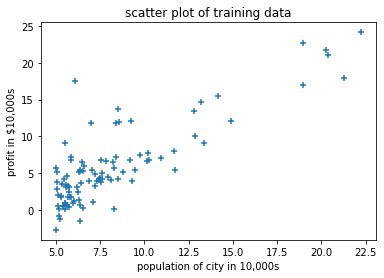

In [4]:
tml.scatter_plot(data[0], data[1], xlabel='population of city in 10,000s',
                    ylabel='profit in $10,000s', title='scatter plot of training data')

Now, we will create features and labels for our regression model. Then we will fit the model using gradient descent function.

In [5]:
X = pd.DataFrame()
X[0] = np.ones((length))
X[1] = data[:][0]
y = data[:][1]
num_feature = X.shape[1]

100%|██████████| 1500/1500 [00:07<00:00, 195.25it/s]


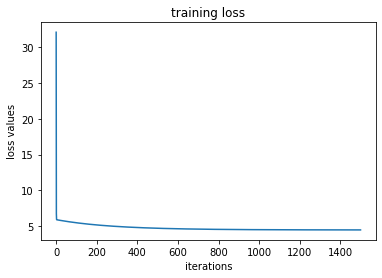

In [6]:
theta = tml.initialize_theta(num_feature)
iterations = 1500
alpha = 0.01 
history, theta = tml.linear_regression.gd(X, y, theta, alpha, iterations)
tml.plot(history, xlabel='iterations', ylabel='loss values', title='training loss')

In [7]:
# print the learned theta values
print(theta)

          0
0 -3.630291
1  1.166362


In [8]:
# predict values with learned theta
print("For population =35,000, we predict a profit of {}".format(
            tml.lin_regression_predict(np.array([1, 3.5]), theta)*10000))

print("For population = 70,000, we predict a profit of {}".format(
            tml.lin_regression_predict(np.array([1, 7.0]), theta)*10000))

For population =35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


### Visualize data with linear regression fit

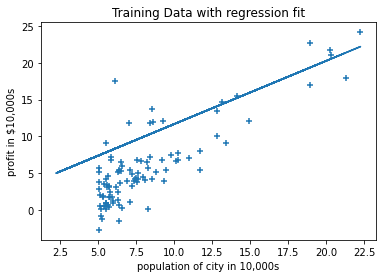

In [9]:
tml.scatter_plot(data[0], data[1], show=False)
tml.plot(X[1], tml.lin_regression_predict(X, theta), xlabel='population of city in 10,000s',
         ylabel='profit in $10,000s', title='Training Data with regression fit')

### Visualize loss surface

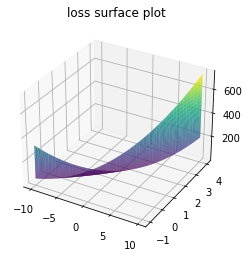

In [10]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

losses = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]]).reshape(2,1)
        losses[i][j] = tml.linear_regression.mse_loss(X, y, t)

tml.surface_plot(theta0, theta1, losses)

In the above 3D plot, it is difficult to understand the loss surface. So, in the following I will plot the contour plot.

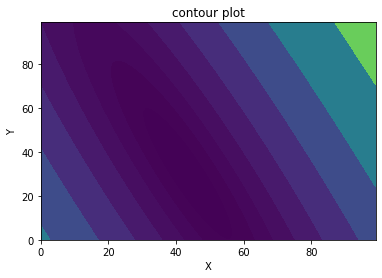

In [11]:
tml.contour_plot(losses, levels=np.logspace(-2, 3, 20))

From the above diagrams and the loss curve, it is clear that the model learn the data well.

<a id='project2'></a>
### 2. Linear Regression (with multiple variables)

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [12]:
# import necessary modules
import pandas as pd
import numpy as np

import traditional_ml as tml

In [13]:
# lets look at the data first
data = pd.read_csv('./datasets/ex1data2.txt', header=None)
m = len(data[0])
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


From the above, it is clear that the feature range is not same. So, we have to normalize the data. 

In [14]:
X_norm, mu, sigma = tml.feature_normalize(data.loc[:, 0:1])
X = pd.DataFrame()

X[0] = np.ones((m))
X[1] = X_norm[0]
X[2] = X_norm[1]
num_feature = X.shape[1]
 
y = data[data.columns[-1]]

Next, we will run gradient descent in the similar way as above. 

100%|██████████| 1500/1500 [00:07<00:00, 201.51it/s]


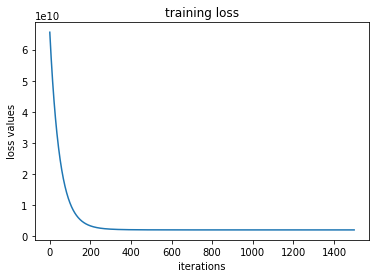

In [15]:
theta = tml.initialize_theta(num_feature)
iterations = 1500
alpha = 0.01

history, theta = tml.linear_regression.gd(X, y, theta, alpha, iterations)
tml.plot(history, xlabel='iterations', ylabel='loss values', title='training loss')

From the above curve, it is clear that the model train is successful.

<a id='project3'></a>
### 3. Logistic Regression (Without Regularization)

In this project, we are using a sample dataset from the same course from coursera to show how to use logistic regression module. In this dataset, two exam score is given and we have to predict whether the student will be admitted or not. This is a binary classification problem. 

In [16]:
# import necessary modules
import pandas as pd
import numpy as np

import traditional_ml as tml

In [17]:
data = pd.read_csv('./datasets/ex2data1.txt', header=None)
length = len(data)

In [18]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
cls_1 = data[data[2]==0]
cls_2 = data[data[2]==1]

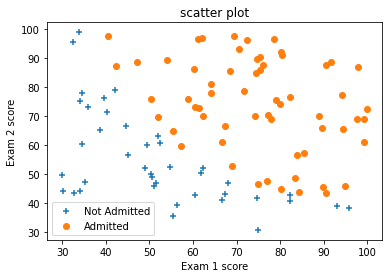

In [20]:
tml.scatter_plot(cls_1[0], cls_1[1], show=False)
tml.scatter_plot(cls_2[0], cls_2[1], m='o', xlabel='Exam 1 score', ylabel='Exam 2 score',
                 legend=['Not Admitted', 'Admitted'])

From the above plot, we can see that the data can be separated with a line. So we do not need regularization for this type of data. Vanila logistic regression algorithm will perform well on this type of data. 

In [21]:
X = pd.DataFrame()

X[0] = np.ones((length))
X[1] = data[0]
X[2] = data[1]
num_feature = X.shape[1]

In [22]:
y = data[data.columns[-1]]

In [23]:
theta = tml.initialize_theta(num_feature)

theta, loss = tml.logistic_regression.optimize_theta(X, y, tml.logistic_regression.logistic_loss, theta, 
                                               tml.logistic_regression.gradient)

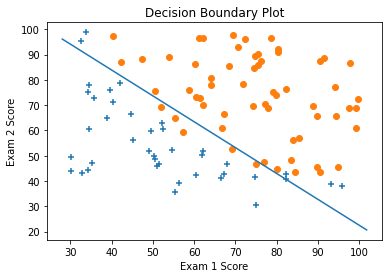

In [24]:
# plotting decision boundary
tml.scatter_plot(cls_1[0], cls_1[1], show=False)
tml.scatter_plot(cls_2[0], cls_2[1], m='o', show=False)
tml.plot_decision_boundary(X, theta, xlabel='Exam 1 Score', ylabel='Exam 2 Score',
                           title='Decision Boundary Plot')

As we expected, with the learned theta values a decision boundary can be drawn which can separate the two class well. So we can say that the learned theta are optimized for this dataset. 

Lets say, one student got 60.0 and 86.0 in two exams respectively. We want to predict whether that student will be accepted or not. The following cell will do that for us-

In [25]:
X = np.array([[1., 60.0, 86.0]])
p = tml.log_regression_predict(X, theta)
print(p)

[[1.]]


So, the student will be accepted according to our prediction. From the plot above, we know that if the student does well in both exam then it is highly likely that the student will be accepted. So, our prediction is according to our dataset. 

<a id='project4'></a>
### 4. Logistic Regression (With Regularization)

In this project, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly. 

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

The dataset is collected from the coursera machine learning course.

In [26]:
import pandas as pd
import numpy as np

import traditional_ml as tml

In [27]:
data = pd.read_csv('./datasets/ex2data2.txt', header=None)
length = len(data)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [28]:
cls_1 = data[data[2]==0]
cls_2 = data[data[2]==1]

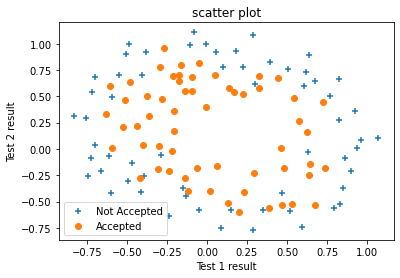

In [29]:
tml.scatter_plot(cls_1[0], cls_1[1], show=False)
tml.scatter_plot(cls_2[0], cls_2[1], m='o', xlabel='Test 1 result', ylabel='Test 2 result',
                 legend=['Not Accepted', 'Accepted'])

The above plot shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### Feature map

One way to fit the data better is to create more features from each data point. In the provided function mapFeature, we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the project, we will implement regularized logistic regression to fit the data and also see for ourselves how regularization can help combat the overfitting problem.

In [30]:
X1 = data[0].values
X2 = data[1].values
# map_feature function will add inception column [np.ones] to the feature vector
X = tml.logistic_regression.map_feature(X1, X2, degree=6)
y = data[data.columns[-1]]
num_feature = X.shape[1]

In [31]:
theta = tml.initialize_theta(num_feature)
theta, loss = tml.logistic_regression.optimize_theta(X, y, tml.logistic_regression.logistic_loss, theta, 
                                               tml.logistic_regression.gradient, lamda=1)

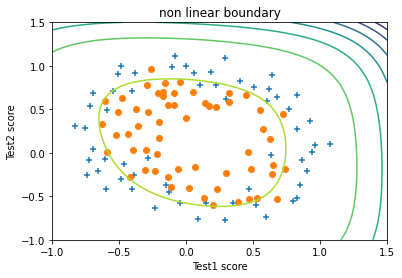

In [32]:
# plotting non linear decision boundary
tml.scatter_plot(cls_1[0], cls_1[1], show=False)
tml.scatter_plot(cls_2[0], cls_2[1], m='o', show=False)
tml.plot_non_linear_boundary(theta, Xlabel="Test1 score", Ylabel="Test2 score", plot_title="non linear boundary")

From the above curve, it is seen that the learned decision boundary fits the dataset well. Lets take a sample data now and try to predit whether that micro chip will be accepted or not. 

In [33]:
X = np.array([[0.5, 0.5]])
high_dimensional_feature = tml.logistic_regression.map_feature(np.array(X[0][0]), np.array(X[0][1]))
p = tml.log_regression_predict(high_dimensional_feature, theta)
print(p)

[[1.]]


Acoording to our prediction this particular chip will be accepted. We can verify this from the above decidion boundary plot.

<a id='project5'></a>
### 5. Logistic Regression (Multi class classification)

For this project, we will use logistic regression to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 

In this project, we will extend our previous implemention of logistic regression and apply it to one-vs-all classification.

In [34]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

import traditional_ml as tml

In [35]:
data = scipy.io.loadmat('./datasets/ex3data1.mat')

In [36]:
X = data['X']
y = data['y']

The label is  [10]


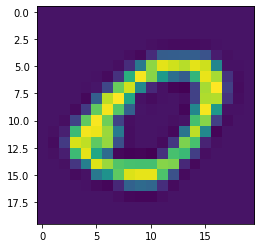

In [37]:
# lets plot a single image from the dataset
img = X[0].reshape(20,20)
plt.imshow(img)
print('The label is ', y[0])

In [38]:
X = np.insert(X, 0, 1, axis=1) # inserting inception column to the feature vector
cls_idx = np.unique(y)
print(cls_idx)

[ 1  2  3  4  5  6  7  8  9 10]


Number 0 is labeled as 10 in this dataset. That is why the class indices starts from 1 and ends at 10.

In [39]:
theta, losses = tml.logistic_regression.optimize_theta_for_multiclass(X, y, tml.logistic_regression.logistic_loss,
                                       tml.logistic_regression.gradient, cls_idx, lamda=0.1)

Now lets predict one image with our learned theta values to see how our model performs.

In [40]:
p = tml.log_regression_predict(X[0].reshape(1, -1), theta, num_cls=10)

In [41]:
np.argmax(p) 

9

The predict function returns probability for each class. Since the index of highest probablity is 9 so the model predicts the image to be 0 class. So our model prediction is correct.

<a id='project6'></a>
### 6. Neural Network

In this project, we will use the same dataset from logistic regression project which is hand written digit classification. We will use neural network algorithm to solve this dataset now. Neural network can learn more complex decision boundary and suitbale for learning complex data.

In [42]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

import traditional_ml as tml

In [43]:
data = scipy.io.loadmat('./datasets/ex3data1.mat')

In [44]:
X = data['X']
y = data['y']

In our neural network, there will be three layers in total. Input layer, hidden layer and output layer. The unit number of input layer depends on the input feature size, in our case it is 400 (without inception). For the hidden layer we chose 25 units. But any suitable number is fine. Finally, we have 10 classes in total, so the final layer's unit size must be 10.

In [45]:
input_layer_size=400
hidden_layer_size=25
num_labels=10

Gradient descent algorithm works better with better weight initialization. So, we can not just use the previous method to initialize theta with all zeros. It will make difficult for neural network to learn through gradient descent. A good choice for weight initialization is as follows-
At first, we need to calculate $\epsilon$ based on the number of units in the layer and it's adjacent layer. $L_{in}$ represents the input size to this layer and $L_{out}$ represents the output size to this layer. Then $\epsilon$ is calculated as follows-

$$\epsilon = \frac{\sqrt6}{\sqrt{(L_{in} + L_{out})}}$$

After calculating epsilon, the weight is initialized as follows-

W = np.random.uniform(size=(Lout, Lin+1)) * 2 * epsilon - epsilon

In [46]:
theta1 = tml.neural_network.rand_init_weight(input_layer_size, hidden_layer_size)
theta2 = tml.neural_network.rand_init_weight(hidden_layer_size, num_labels)
nn_params = np.append(theta1.flatten(), theta2.flatten())

A learning rate needs to be chosen for the training with gradient descent. In this project learning rate is set to 0.8. The total number of iteration is set to 800. As the gradient descent calculation is complex, the time required for this training depends on the CPU of your machine and the number of iteration. 

In [47]:
# set training params
learning_rate = 0.8
iteration = 800
lamda = 3 # regularized parameters

In [48]:
theta, loss_history = tml.neural_network.optimize_theta(X, y, nn_params, learning_rate, iteration,
                                                         lamda, input_layer_size,
                                                         hidden_layer_size, num_labels)
# unrolling theta
theta1 = theta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
theta2 = theta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)


100%|██████████| 800/800 [04:58<00:00,  2.68it/s]


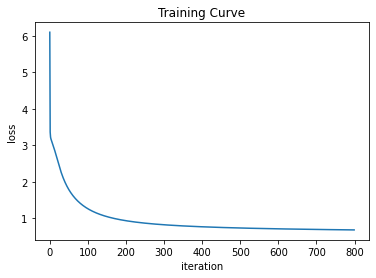

In [49]:
tml.plot(loss_history, xlabel="iteration", ylabel="loss", title="Training Curve")

The label is  [10]


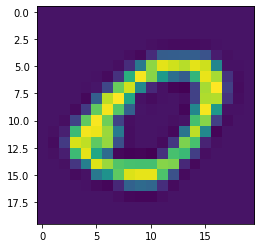

In [50]:
# lets plot a single image from the dataset
img = X[0].reshape(20,20)
plt.imshow(img)
print('The label is ', y[0])

In [51]:
# now lets predict this image with our trained neural network.
tml.neural_network.nn_predict(theta1, theta2, X[0].reshape(1, -1))

array([10])

The model predicted correctly that this is a zero which is labeled as 10 in our dataset. So we successfully trained the model using our functions. 

<a id='project7'></a>
### 7. Polynomial Regression

In this project, we will learn a very important concept of machine learning calld bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

In this example, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. The dataset is collected from the same coursera machine learning course.

At first, we will try to use linear regression then we will analyze the model performance. At last, we will improve the performance of the model with polynomial regression.

In [1]:
import scipy.io
import numpy as np

import traditional_ml as tml

In [2]:
data = scipy.io.loadmat('./datasets/ex5data1.mat')

In [3]:
data.keys()
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

As before, lets plot the data and train a linear regression model on this data.

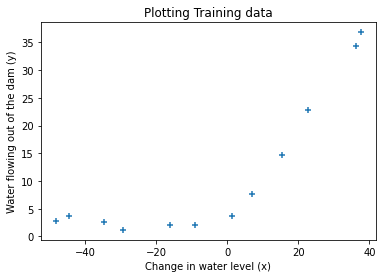

In [4]:
tml.scatter_plot(X, y, xlabel="Change in water level (x)", ylabel="Water flowing out of the dam (y)",
                title="Plotting Training data")

In [5]:
X = np.insert(X, 0, 1, axis=1)
feature = X.shape[1]

In [6]:
theta = tml.initialize_theta(feature)

In [7]:
# training parameters
iterations = 5000
lamda = 0.
alpha = 0.001

In [8]:
loss_hist, theta = tml.linear_regression.gd(X, y, theta, alpha, iterations, lamda)

100%|██████████| 5000/5000 [00:00<00:00, 9597.59it/s] 


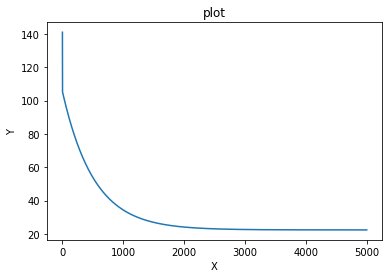

In [9]:
tml.plot(loss_hist)

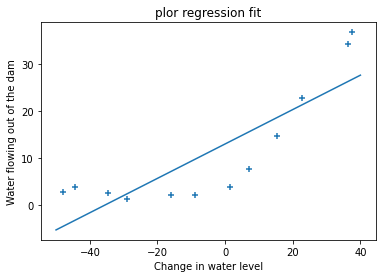

In [10]:
tml.scatter_plot(X[:, 1], y, show=False)
tml.plot((theta[0]+ (theta[1]*np.linspace(-50,40))), np.linspace(-50,40), xlabel='Change in water level',
         ylabel='Water flowing out of the dam', title='plor regression fit')

#### Learning Curve analysis

As this is linear regression model and can only fit a straight line to the data, this type of model is not very suitable for this dataset. This model is too simple to learn this data pattern. This is known as high bias problem. To detect this problem we need a learning curve.

Learning curves is useful in debugging learning algorithms. A learning curve plots training and cross validation error as a function of training set size. To plot the learning curve, we need a training and cross validation set
error for different training set sizes. To obtain different training set sizes,
we will use different subsets of the original training set X.

In [11]:
Xval = np.insert(Xval, 0, 1, axis=1)

100%|██████████| 200/200 [00:00<00:00, 6023.57it/s]


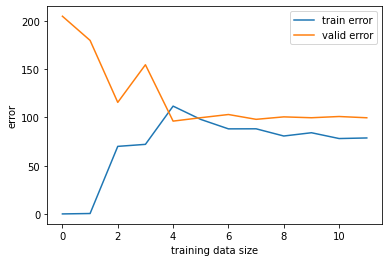

In [12]:
tml.plot_learning_curve(X, y, Xval, yval, lamda=1)

In the above plot, we observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model. The linear regression model is too simple and is unable to fit our dataset well.

#### Polynomial Regression

Now, we will use polynomial regression for the same dataset. Polynomial regression model is able to learn polynomial feature thus it is suitable for our dataset. But polynomial regression is often suffers from overfitting. Thus we need to regularize the model. We will introduce a regularization parameter in this experiment to avoid over fitting.

The the following cell, we will create polynomial feature to train our model.

In [4]:
X_poly_train = tml.linear_regression.poly_features(X, 8)
X_poly_train, mu, sigma = tml.feature_normalize(X_poly_train)
X_poly_train = np.insert(X_poly_train, 0, 1, axis=1)

X_poly_val = tml.linear_regression.poly_features(Xval, 8)
X_poly_val = X_poly_val-mu
X_poly_val = X_poly_val/sigma
X_poly_val = np.insert(X_poly_val, 0, 1, axis=1)

# X_poly_test = tml.linear_regression.poly_features(Xtest, 8)
# X_poly_test = X_poly_test-mu
# X_poly_test = X_poly_test/sigma
# X_poly_test = np.insert(X_poly_test, 0, 1, axis=1)

In [5]:
feature = X_poly_train.shape[1]
theta = tml.initialize_theta(feature)

To demonsrate that, polynomial regression easily overfits the data we will set the regularization parameter to zero and then try to train the model.

In [6]:
# training parameters
iterations = 2000
lamda = 0.
alpha = 0.00001

In [7]:
loss_hist, theta = tml.linear_regression.gd(X_poly_train, y, theta, alpha, iterations, lamda)

100%|██████████| 2000/2000 [00:00<00:00, 7499.06it/s]


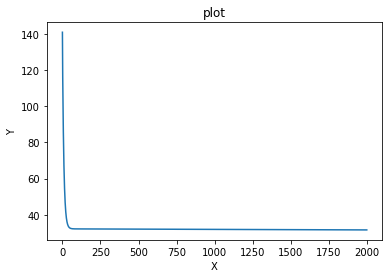

In [8]:
tml.plot(loss_hist)

We can see from the above plot that the training loss is decreasing with iteration. It means the model is doing well on training data. 

Lets plot the learned polynomial line by the model below- 

In [9]:
x = np.linspace(np.min(X), np.max(X))
X_poly = tml.linear_regression.poly_features(x, 8)
X_poly = X_poly-mu
X_poly = X_poly/sigma
X_poly = np.insert(X_poly, 0, 1, axis=1)

In [10]:
prediction = tml.lin_regression_predict(X_poly, theta)

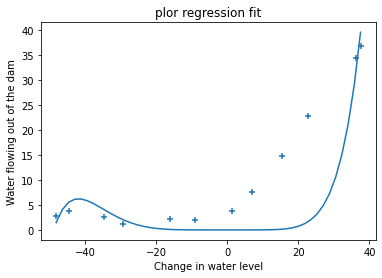

In [11]:
tml.scatter_plot(X, y, show=False)
tml.plot(prediction, x, xlabel='Change in water level',
         ylabel='Water flowing out of the dam', title='plor regression fit')

  0%|          | 0/200 [00:00<?, ?it/s]/home/shamim/traditional_ML/traditional_ml/linear_regression/loss.py:9: RuntimeWarning: overflow encountered in square
  diff = np.sum(np.square(hypothesis-y.reshape(-1, 1)))
/home/shamim/traditional_ML/traditional_ml/linear_regression/loss.py:11: RuntimeWarning: overflow encountered in square
  theta_sum = np.sum(np.square(theta[1:]))
100%|██████████| 200/200 [00:00<00:00, 7768.67it/s]
/home/shamim/traditional_ML/traditional_ml/linear_regression/loss.py:12: RuntimeWarning: invalid value encountered in double_scalars
  regularized_term = (lamda/(2*m)) * theta_sum
100%|██████████| 200/200 [00:00<00:00, 7818.48it/s]


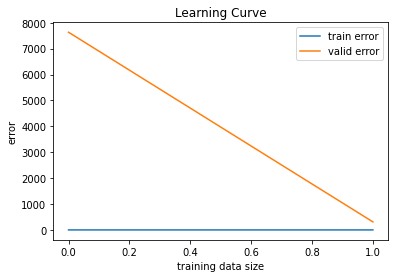

In [12]:
tml.plot_learning_curve(X_poly_train, y, X_poly_val, yval, lamda=1)

From the above learning curve analysis, it is clear that the model is doing well on training set but the validation set error is very high. Thus, we can say that the model is suffering from high variance problem. We need to find a suitable lamda value to train a model which can perform well both on training and test data. 